In [ ]:
사용 데이터 :  상가정보 데이터셋 - 2015년 12월 ~ 2019년 12월



In [10]:
import warnings
warnings.filterwarnings('ignore')

# 라이브러리 import

import pandas as pd
import numpy as np

# 시각화 라이브러리 import

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import squarify #treemap

In [26]:
#한글폰트 사용
import matplotlib.font_manager as fm

#나눔폰트 확안
sys_font = fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")


sys_font number: 765


In [27]:
nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number : {len(nanum_font)}")

nanum_font number : 6


In [32]:
#한글폰트 사용
path = 'C:/Users/hongm/Downloads/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothicLight.ttf'  
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)

NanumBarunGothic


In [34]:
plt.rcParams['axes.unicode_minus'] = False #matplotlib에서 마이너스 부호가 깨질때 사용
plt.rcParams['font.family'] = 'NanumBarunGothic'
plt.rcParams["font.size"] = 14
plt.rcParams["figure.figsize"] = (12,8)

In [16]:
df_seoul = pd.read_csv('C:/Users/hongm/Downloads/소상공인시장진흥공단_상가(상권)정보_20200930/소상공인시장진흥공단_상가(상권)정보_서울_202009.csv', encoding='utf-8', delimiter='|')
df_seoul.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [18]:
df_seoul.shape

(367534, 39)

In [19]:
df_seoul.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [21]:
df_seoul.isnull().sum()

상가업소번호            0
상호명               0
지점명          310764
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      23171
표준산업분류명       23171
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명             76
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         71108
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        322866
건물관리번호            0
건물명          190700
도로명주소             0
구우편번호             0
신우편번호             2
동정보          338249
층정보          125569
호정보          308949
경도                0
위도                0
dtype: int64

In [23]:
#결측지
df_seoul.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367534 entries, 0 to 367533
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     367534 non-null  int64  
 1   상호명        367534 non-null  object 
 2   지점명        56770 non-null   object 
 3   상권업종대분류코드  367534 non-null  object 
 4   상권업종대분류명   367534 non-null  object 
 5   상권업종중분류코드  367534 non-null  object 
 6   상권업종중분류명   367534 non-null  object 
 7   상권업종소분류코드  367534 non-null  object 
 8   상권업종소분류명   367534 non-null  object 
 9   표준산업분류코드   344363 non-null  object 
 10  표준산업분류명    344363 non-null  object 
 11  시도코드       367534 non-null  int64  
 12  시도명        367534 non-null  object 
 13  시군구코드      367534 non-null  int64  
 14  시군구명       367534 non-null  object 
 15  행정동코드      367534 non-null  int64  
 16  행정동명       367458 non-null  object 
 17  법정동코드      367534 non-null  int64  
 18  법정동명       367534 non-null  object 
 19  지번코드       367534 non-n

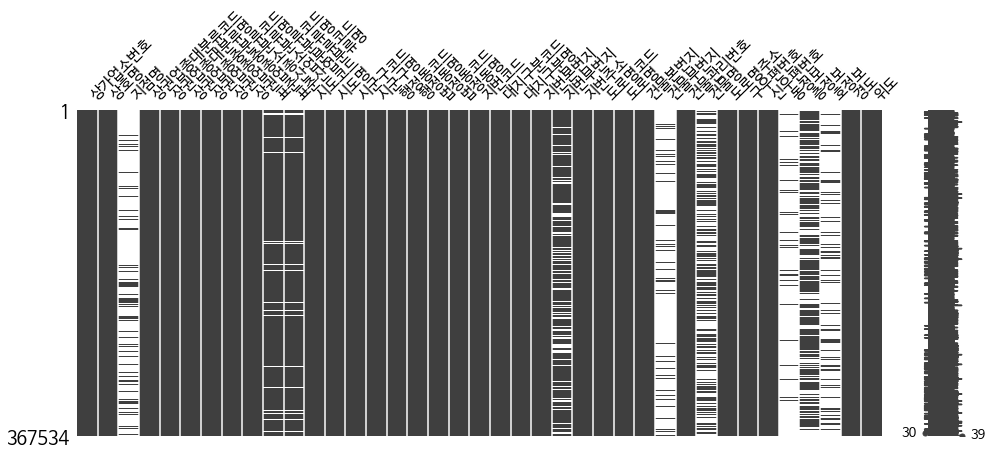

In [36]:
#결측지 heatmap 시각화
import missingno as msno

msno.matrix(df_seoul, fontsize=15, figsize=(16,6))

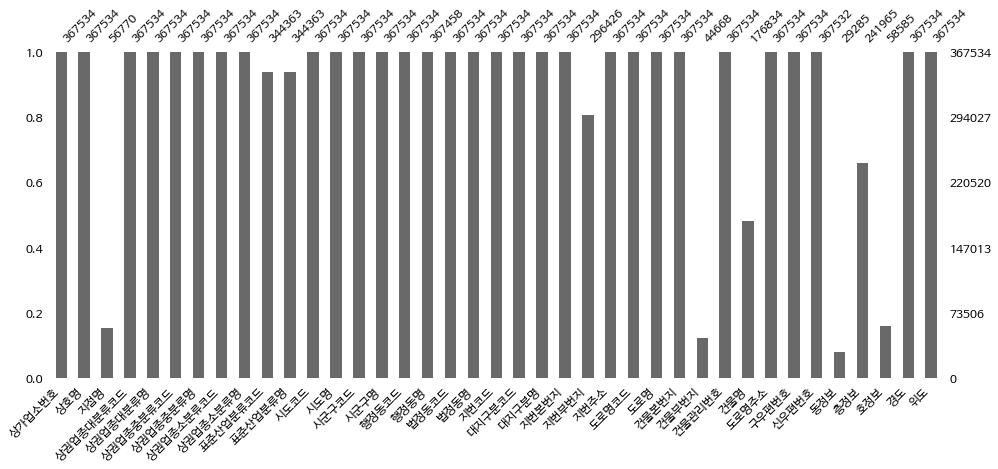

In [38]:
# missingno barplot

msno.bar(df_seoul, fontsize=12, figsize=(16,6))

In [40]:
#결측치 처리1

df_seul_columns = ['상가업소번호', '상호명', '상권업종대분류코드', 
              '상권업종대분류명', '상권업종중분류코드','상권업종중분류명',
              '상권업종소분류코드', '상권업종소분류명',
              '시도코드','시도명', '시군구코드', '시군구명', '행정동코드', 
              '행정동명', '법정동코드', '법정동명', '지번코드','대지구분코드',
              '대지구분명', '지번본번지','지번주소', '도로명코드', '도로명', 
              '건물본번지','도로명주소', '신우편번호',
              '경도', '위도']

df_store_seul=df_seoul[df_seul_columns].copy()
df_store_seul.shape



(367534, 28)

In [42]:
df_store_seul.isnull().sum()

상가업소번호        0
상호명           0
상권업종대분류코드     0
상권업종대분류명      0
상권업종중분류코드     0
상권업종중분류명      0
상권업종소분류코드     0
상권업종소분류명      0
시도코드          0
시도명           0
시군구코드         0
시군구명          0
행정동코드         0
행정동명         76
법정동코드         0
법정동명          0
지번코드          0
대지구분코드        0
대지구분명         0
지번본번지         0
지번주소          0
도로명코드         0
도로명           0
건물본번지         0
도로명주소         0
신우편번호         2
경도            0
위도            0
dtype: int64

In [52]:
df_store_clean = df_store_seul.dropna(axis=0)
df_store_clean.shape

(367456, 28)

In [53]:
df_store_clean.isnull().sum()

상가업소번호       0
상호명          0
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        0
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
도로명주소        0
신우편번호        0
경도           0
위도           0
dtype: int64

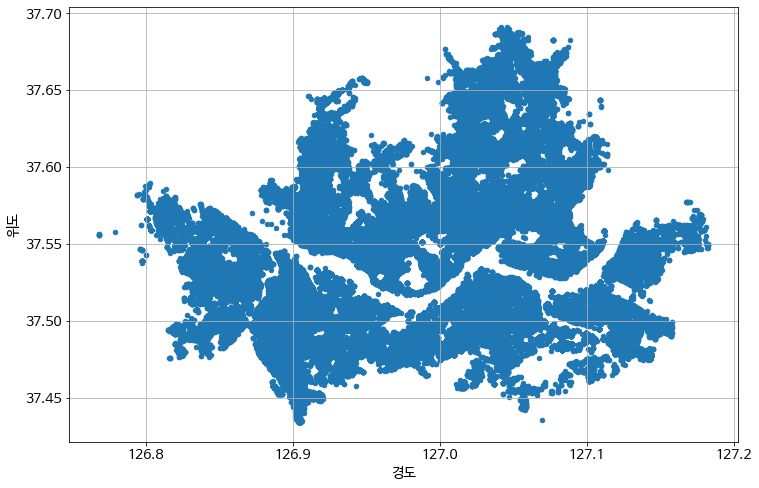

In [54]:
#위도와 경도로 산점도 시각화

df_store_clean.plot.scatter(x='경도', y='위도', figsize=(12,8), grid=True)

In [55]:
df_store_clean['도로명주소'][:10]

0         서울특별시 강남구 선릉로93길 6
1         서울특별시 금천구 가산로 34-6
2       서울특별시 강남구 남부순환로 2933
3           서울특별시 송파구 가락로 71
4          서울특별시 성북구 안암로 145
5          서울특별시 구로구 경인로 577
6         서울특별시 성북구 동소문로 315
7    서울특별시 영등포구 도신로10가길 11-1
8      서울특별시 성동구 아차산로7길 17-1
9          서울특별시 성동구 금호산길 62
Name: 도로명주소, dtype: object

In [56]:
df_store_seoul = df_store_clean.loc[df_store_clean['도로명주소'].str.startswith('서울')]
df_store_other = df_store_clean.loc[~df_store_clean['도로명주소'].str.startswith('서울')]

In [57]:
df_store_seoul.shape

(367456, 28)

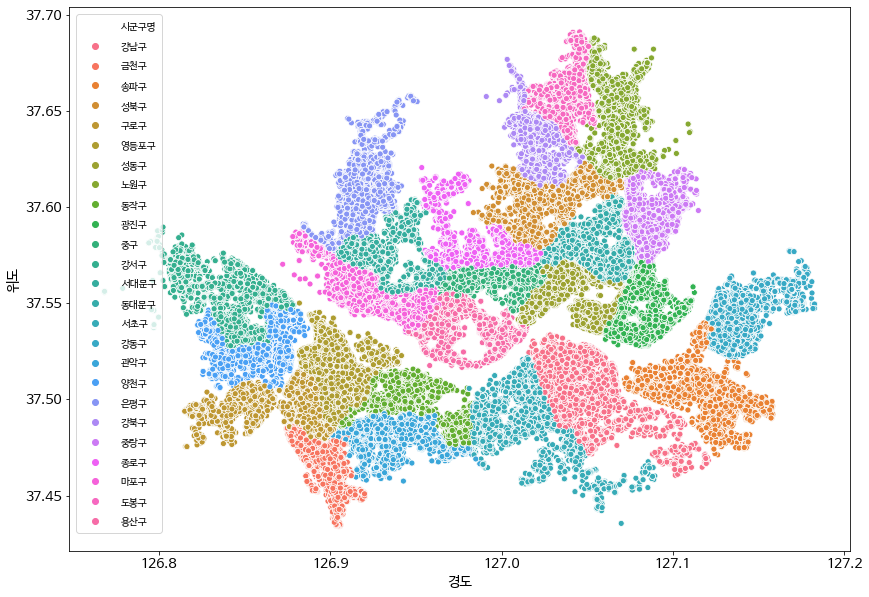

In [59]:
# seaborn으로 시각화
# 서울을 시군구명으로 구분지어 표시해봅니다.

plt.figure(figsize=(14, 10))
ax = sns.scatterplot(data=df_store_seoul, 
                     x='경도', 
                     y='위도', 
                     hue='시군구명')
plt.setp(ax.get_legend().get_texts(), fontsize='10')
plt.show()

In [67]:
#맥도날드 단어가 포함된 데이터셋만 출력하기

temp1 = df_store_seoul[df_store_seoul['상호명'].str.contains('맥도날드')]
print(temp1.shape)
temp1.head(3)

(133, 28)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,도로명주소,신우편번호,경도,위도
13538,22500119,맥도날드,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,대지,361,서울특별시 광진구 군자동 361-24,112153005024,서울특별시 광진구 광나루로,383,서울특별시 광진구 광나루로 383,5005.0,127.072479,37.548067
21773,25329817,맥도날드,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,대지,502,서울특별시 강동구 상일동 502,117404172444,서울특별시 강동구 상일로6길,39,서울특별시 강동구 상일로6길 39,5288.0,127.175331,37.549794
25432,20564587,맥도날드,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,대지,456,서울특별시 은평구 갈현동 456-28,113803111006,서울특별시 은평구 연서로,213,서울특별시 은평구 연서로 213,3331.0,126.919206,37.617621


In [69]:
temp2 = df_store_seoul[df_store_seoul['상호명'].str.lower().str.contains('맥도날드|mcdonald')]
print(temp2.shape)
temp2.head(3)

(133, 28)


,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,대지구분명,지번본번지,지번주소,도로명코드,도로명,건물본번지,도로명주소,신우편번호,경도,위도
13538,22500119,맥도날드,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,대지,361,서울특별시 광진구 군자동 361-24,112153005024,서울특별시 광진구 광나루로,383,서울특별시 광진구 광나루로 383,5005.0,127.072479,37.548067
21773,25329817,맥도날드,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,대지,502,서울특별시 강동구 상일동 502,117404172444,서울특별시 강동구 상일로6길,39,서울특별시 강동구 상일로6길 39,5288.0,127.175331,37.549794
25432,20564587,맥도날드,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,대지,456,서울특별시 은평구 갈현동 456-28,113803111006,서울특별시 은평구 연서로,213,서울특별시 은평구 연서로 213,3331.0,126.919206,37.617621


In [72]:
#같은 상호명이지만, 상권업종이 다를 수 도 있기때문에 확인하기. 

df_Mac_20= df_store_seoul[df_store_seoul['상호명'].str.lower().str.contains('맥도날드|mcdonald')]['상권업종소분류명'].unique()

In [92]:
#2020년 서울의 맥도날드 매장 생성 

df_mac_20 = df_store_seoul[\
                    (df_store_seoul['도로명주소'].str.startswith('서울'))&\
                    (df_store_seoul['상권업종소분류명']=='패스트푸드')&\
                    (df_store_seoul['상호명'].str.lower().str.contains("맥도날드|mcdonald"))]
df_mac_20['brand'] = 'mac'
print(df_mac_20.shape)

#2020년 서울의 버거킹 매장 생성 

df_bk_20 = df_store_seoul[\
                    (df_store_seoul['도로명주소'].str.startswith('서울'))&\
                    (df_store_seoul['상권업종소분류명']=='패스트푸드')&\
                    (df_store_seoul['상호명'].str.lower().str.contains("버거킹|burgerking"))]
 
df_bk_20['brand'] = 'bk'
print(df_bk_20.shape)

#2020년 서울의 롯데리아 매장 생성 

df_lott_20 = df_store_seoul[\
                    (df_store_seoul['도로명주소'].str.startswith('서울'))&\
                    (df_store_seoul['상권업종소분류명']=='패스트푸드')&\
                    (df_store_seoul['상호명'].str.lower().str.contains("롯데리아|lotteria"))]
print(df_lott_20.shape)
df_lott_20['brand'] = 'lott'

#2020년 서울의 맘스터치 매장 생성 

df_moms_20 = df_store_seoul[\
                    (df_store_seoul['도로명주소'].str.startswith('서울'))&\
                    (df_store_seoul['상권업종소분류명']=='패스트푸드')&\
                    (df_store_seoul['상호명'].str.lower().str.contains("맘스터치|momstouch"))]
print(df_moms_20.shape)
df_moms_20['brand'] = 'moms'

(133, 29)
(144, 29)
(156, 28)
(40, 28)


In [93]:
#하나의 데이터 셋으로 
df_fastfood = pd.concat([df_mac_20, df_bk_20, df_lott_20, df_moms_20], axis=0).reset_index(drop=True)

df_fastfood.shape

(473, 29)

In [94]:
df_fastfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     473 non-null    int64  
 1   상호명        473 non-null    object 
 2   상권업종대분류코드  473 non-null    object 
 3   상권업종대분류명   473 non-null    object 
 4   상권업종중분류코드  473 non-null    object 
 5   상권업종중분류명   473 non-null    object 
 6   상권업종소분류코드  473 non-null    object 
 7   상권업종소분류명   473 non-null    object 
 8   시도코드       473 non-null    int64  
 9   시도명        473 non-null    object 
 10  시군구코드      473 non-null    int64  
 11  시군구명       473 non-null    object 
 12  행정동코드      473 non-null    int64  
 13  행정동명       473 non-null    object 
 14  법정동코드      473 non-null    int64  
 15  법정동명       473 non-null    object 
 16  지번코드       473 non-null    int64  
 17  대지구분코드     473 non-null    int64  
 18  대지구분명      473 non-null    object 
 19  지번본번지      473 non-null    int64  
 20  지번주소      

In [95]:
df_fastfood.isnull().sum()

상가업소번호       0
상호명          0
상권업종대분류코드    0
상권업종대분류명     0
상권업종중분류코드    0
상권업종중분류명     0
상권업종소분류코드    0
상권업종소분류명     0
시도코드         0
시도명          0
시군구코드        0
시군구명         0
행정동코드        0
행정동명         0
법정동코드        0
법정동명         0
지번코드         0
대지구분코드       0
대지구분명        0
지번본번지        0
지번주소         0
도로명코드        0
도로명          0
건물본번지        0
도로명주소        0
신우편번호        0
경도           0
위도           0
brand        0
dtype: int64

In [96]:
df_fastfood.sample()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도코드,시도명,...,지번본번지,지번주소,도로명코드,도로명,건물본번지,도로명주소,신우편번호,경도,위도,brand
39,26479517,한국맥도날드마리오아울렛,Q,음식,Q07,패스트푸드,Q07A04,패스트푸드,11,서울특별시,...,60,서울특별시 금천구 가산동 60-22,115453000026,서울특별시 금천구 디지털로,185,서울특별시 금천구 디지털로 185,8511.0,126.8872,37.477978,mac


In [133]:
#최근 패스트푸트 시군구별 매장수 살펴보기 
df_fastfood_count = pd.DataFrame(df_fastfood.groupby(by=['시군구명','brand'])['brand'].count())
df_fastfood_count.columns=['매장수']
df_fastfood_count

매장수
시군구명 brand     
강남구  bk      24
     lott     7
     mac     14
     moms     1
강동구  bk       6
...         ...
중구   moms     1
중랑구  bk       4
     lott     3
     mac      3
     moms     1

[94 rows x 1 columns]

In [140]:
# 멀티 인덱스 중 원하는 인덱스를 칼럼으로 보낼때 reset_index를 사용합니다.

df_fastfood_count.reset_index(level=["brand"], inplace=True)
df_fastfood_count

,brand,매장수
시군구명,,
강남구,bk,24
강남구,lott,7
강남구,mac,14
강남구,moms,1
강동구,bk,6
...,...,...
중구,moms,1
중랑구,bk,4
중랑구,lott,3


In [124]:
df_fastfood_count_gu = pd.DataFrame(df_fastfood.groupby(by=['시군구명'])['brand'].count())
df_fastfood_count_gu

,brand
시군구명,
강남구,46
강동구,21
강북구,10
강서구,28
관악구,14
광진구,18
구로구,14
금천구,13
노원구,12


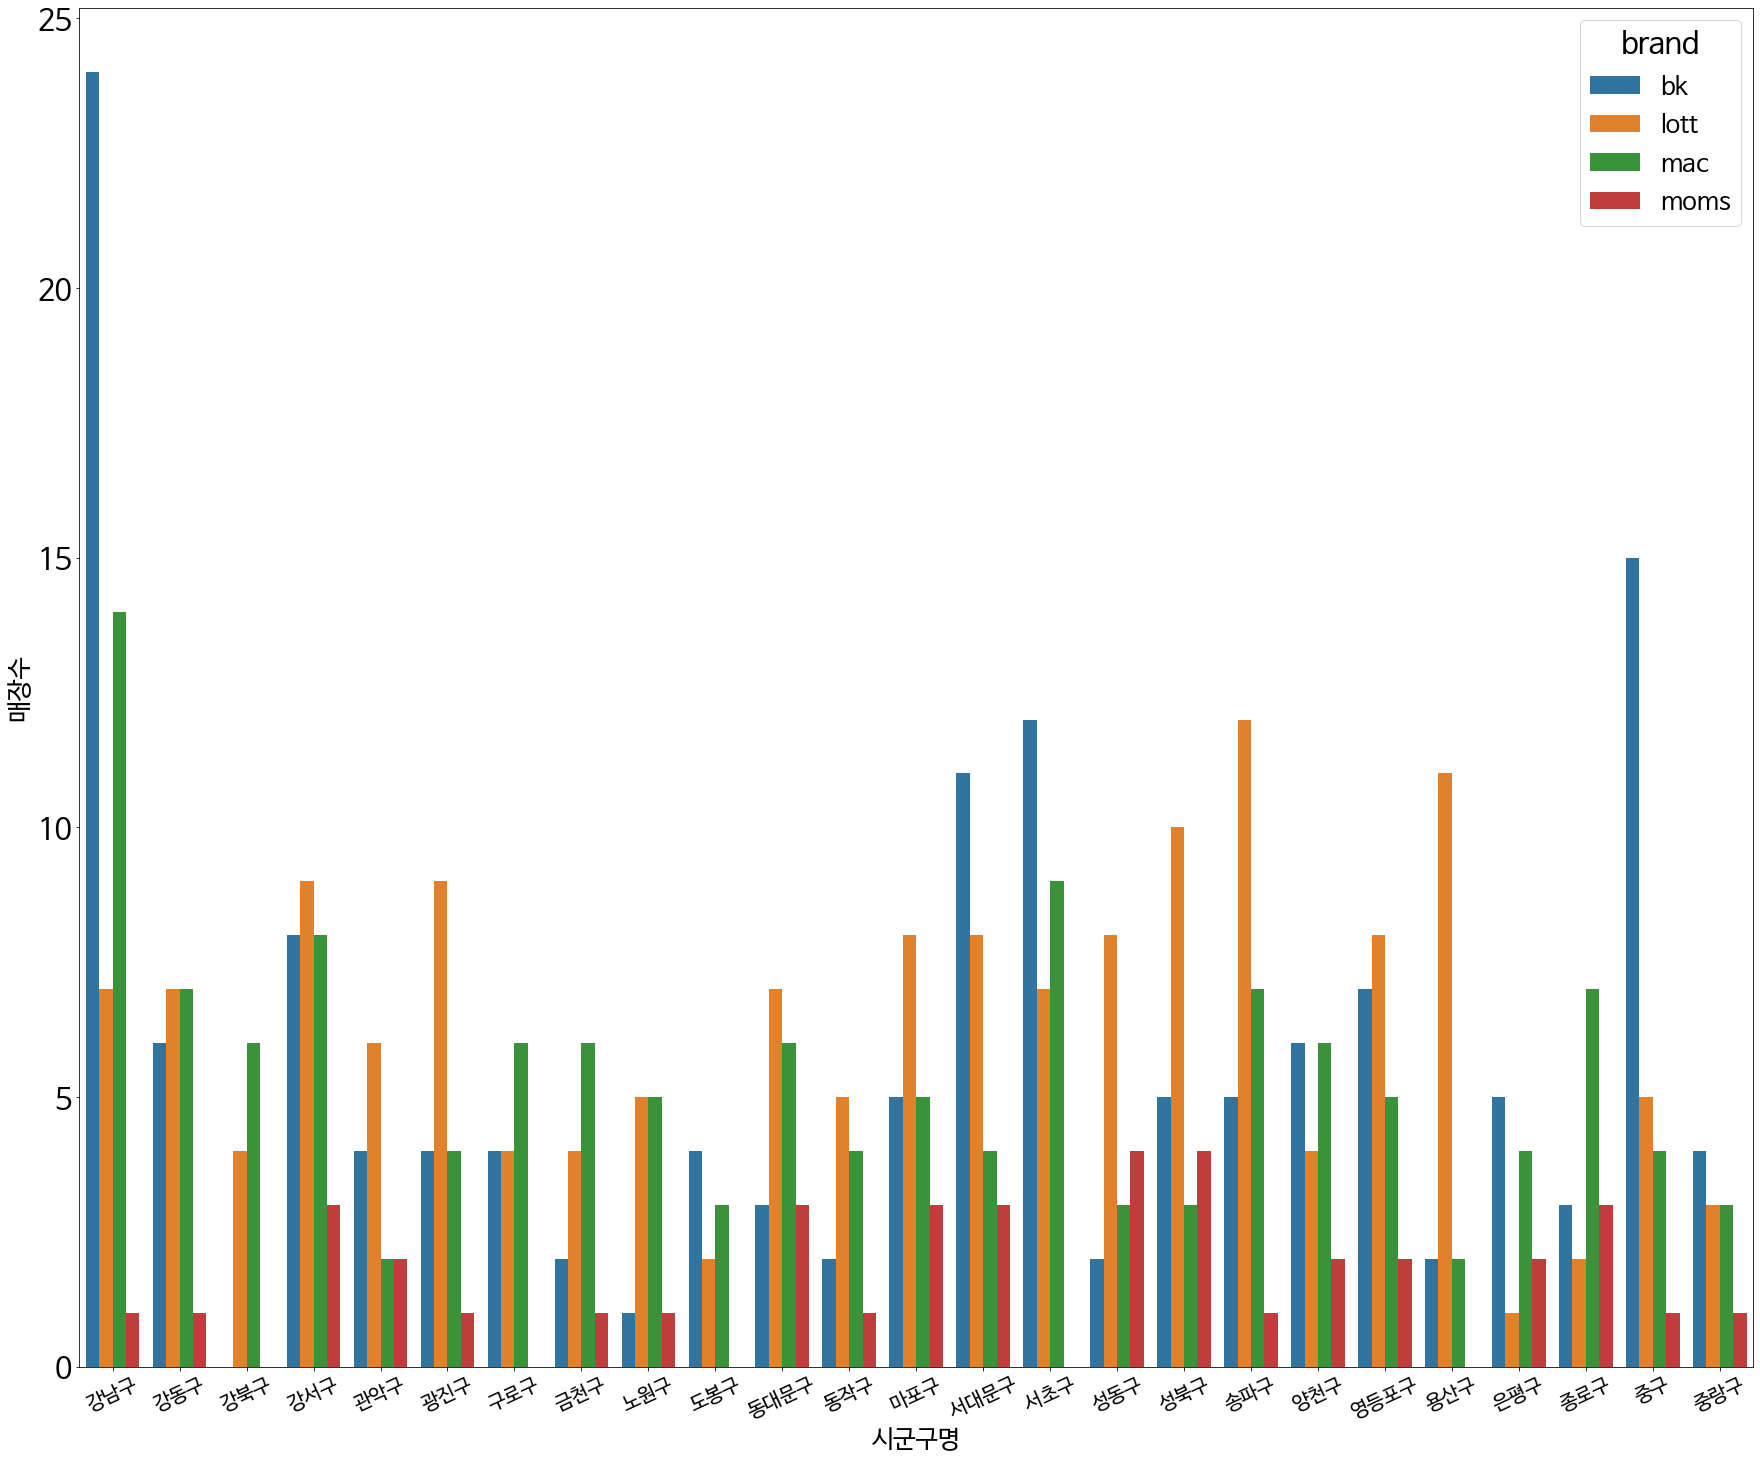

In [158]:
# barplot
# 다른 브랜드들과 비교 

# plot 사이즈 조절
plt.figure(figsize=(30,25)) # 차트 사이즈
plt.rc('legend', fontsize=25) # 범례 사이즈
plt.rc('axes', labelsize=25) # 축 제목
plt.rc('font', size=30) # x,y 축 값
plt.xticks(fontsize=20, rotation=25) # x축 값

sns.barplot(data = df_fastfood_count,
           x = df_fastfood_count.index,
           y = '매장수',
           hue = 'brand',
#            palette="Blues_d"
           )

plt.show()

In [164]:
import folium

In [166]:
df_geo = df_mac_20

map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=1)

map

In [169]:
# folium을 통한 2019년도 서울의 맥도날드 매장 분포 시각화

# 사용할 데이터
df_geo = df_mac_20

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac'):
        icon_color = 'red'
        icon_shape = 'home'
                
#     else:
#         icon_color = 'pink'        
    
    folium.Marker([df_geo.loc[g, '위도'], df_geo.loc[g, '경도']], 
                  icon=folium.Icon(color=icon_color,
                                  icon=icon_shape)).add_to(map)

# map.save('./map1.html')
map


In [170]:
# folium.CircleMaker

# 사용할 데이터
df_geo = df_mac_20

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac'):
        icon_color = 'red'
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map

In [173]:
import json

geo_path_seoul = 'C:/Users/hongm/Downloads/seoul-maps-master/seoul-maps-master/kostat/2013/json/seoul_municipalities_geo.json'
geo_json = json.load(open(geo_path_seoul, encoding='utf-8'))

In [177]:
geo_gu = pd.DataFrame(df_mac_20['시군구명'].value_counts())

# 인덱싱 재지정
geo_gu = geo_gu.reset_index()
geo_gu.columns = ['구', '매장수']
geo_gu

,구,매장수
0,강남구,14
1,서초구,9
2,강서구,8
3,강동구,7
4,송파구,7
5,종로구,7
6,동대문구,6
7,구로구,6
8,금천구,6
9,강북구,6


In [180]:
# 맥도날드 매장과 함께 표시해주기
# folium.CircleMaker

# 사용할 데이터
df_geo = df_mac_20

# 지도를 처음 열어줄 때, 어디를 중심으로 보여줄지 설정합니다.
# 위도와 경도의 평균값을 중심점으로 잡습니다.
# zoom_start는 처음 지도의 크기를 뜻합니다.
map = folium.Map(location=[df_geo['위도'].mean(),df_geo['경도'].mean()],
                           zoom_start=11.5)

# choropleth map
map.choropleth(geo_data = geo_json,
               data = geo_gu,
               columns = ['구', '매장수'],
               key_on = 'feature.properties.name',
               fill_color = 'GnBu',               
               fill_opacity=0.5,
               line_opacity=0.7,
               highlight=True)

# 지도 시각화
for g in df_geo.index:
    
    if (df_geo.loc[g, 'brand'] == 'mac') :
        icon_color = 'red'
      
    folium.CircleMarker(
        location=[df_geo.loc[g,'위도'], df_geo.loc[g, '경도']],
        radius=2,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)

# map.save(./map2.html')
map